Davies-Bouldin Index: 0.537546309755815


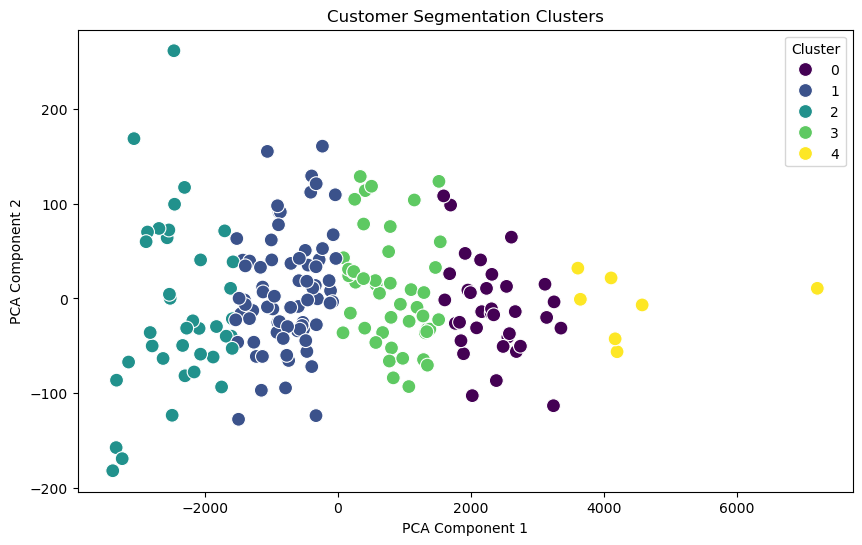

In [2]:
# Import required libraries
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets to create merged_data
transactions_products = transactions.merge(
    products, on='ProductID', suffixes=('_transaction', '_product')
)
merged_data = transactions_products.merge(
    customers, on='CustomerID', suffixes=('', '_customer')
)

# Create customer_profile
customer_profile = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',          # Total transaction value per customer
    'Quantity': 'sum',            # Total quantity purchased per customer
    'Price_transaction': 'mean',  # Average price per transaction
}).reset_index()

# Prepare data for clustering
clustering_data = customer_profile[['TotalValue', 'Quantity', 'Price_transaction']]

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(clustering_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_data)
customer_profile['Cluster'] = clusters

# Evaluate clustering using Davies-Bouldin Index
db_index = davies_bouldin_score(clustering_data, clusters)
print("Davies-Bouldin Index:", db_index)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette="viridis", s=100)
plt.title("Customer Segmentation Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()
